In [2]:
%matplotlib inline


Recognizing hand-written digits
An example showing how the scikit-learn can be used to recognize images of
hand-written digits.

Accuracy: 0.988888888889
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        32
          1       1.00      1.00      1.00        36
          2       1.00      1.00      1.00        30
          3       1.00      1.00      1.00        41
          4       0.97      0.97      0.97        32
          5       0.98      1.00      0.99        46
          6       1.00      1.00      1.00        32
          7       0.98      1.00      0.99        40
          8       0.98      0.98      0.98        42
          9       1.00      0.93      0.96        29

avg / total       0.99      0.99      0.99       360

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.01}


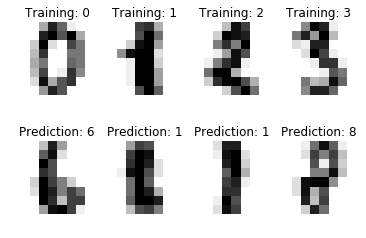

In [33]:
"""
================================
Recognizing hand-written digits
================================
An example showing how the scikit-learn can be used to recognize images of
hand-written digits.
"""
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, svm, metrics


# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 3 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# pylab.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
steps = [('scaler', StandardScaler()),
         ('SVM', svm.SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 1, 10],
              'SVM__gamma':[0.01, 0.1]} 

cv = GridSearchCV(pipeline,parameters)

# We learn the digits on the first half of the digits
X_train, X_test, y_train, y_test = train_test_split(data,digits.target,test_size=0.2,random_state=21)

cv.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

X_test = X_test.reshape(len(X_test),8,8)
images_and_predictions = list(zip(X_test, y_pred))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()


In [27]:
digits.images.shape

(1797L, 8L, 8L)